In [32]:
import pandas as pd#imporing basic required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [33]:
file='/content/blogs.csv'#loading dataset
df = pd.read_csv(file,encoding='latin')#loading dataset as df with encoding to avoid encoding errors

In [34]:
df#viewing dataset

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [35]:
df['Labels'].value_counts()#unique values and their  sum of label columns

,count
Labels,
alt.atheism,100
comp.graphics,100
talk.politics.misc,100
talk.politics.mideast,100
talk.politics.guns,100
soc.religion.christian,100
sci.space,100
sci.med,100
sci.electronics,100


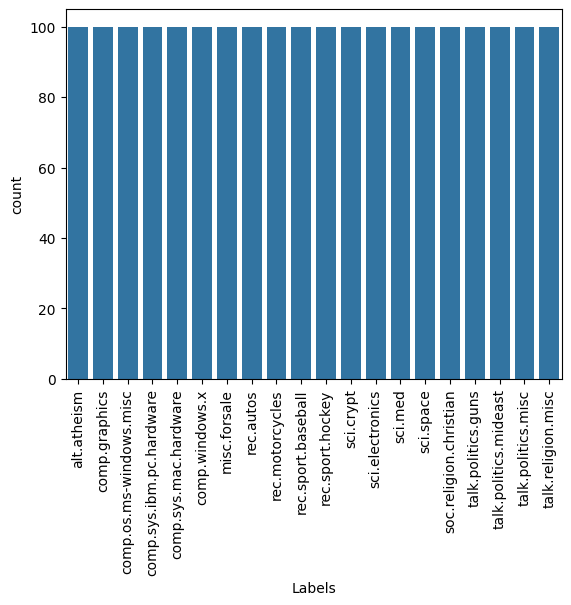

In [36]:
sns.countplot(x='Labels', data=df)#distribution of categories
plt.xticks(rotation=90)
plt.show()

# **Data Exploration and Preprocessing**

In [37]:
import nltk
nltk.download('stopwords')#downloading stopwords
nltk.download('punkt')#downloading punkt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def clean_text(text):#defining a text cleaning function
  text=re.sub(r'[^\w\s]','',text)#removing punctuations
  text=text.lower()#converting to lowercase
  tokens=word_tokenize(text)#tokenizing the text
  tokens=[word for word in tokens if word not in stopwords.words('english')]#removing stopwords
  return ' '.join(tokens)#joining token back into single string

#applying text cleaning to data
df['Cleaned_Text']=df['Data'].apply(clean_text)
print(df['Cleaned_Text'].head())

0    path cantaloupesrvcscmuedumagnesiumclubcccmued...
1    newsgroups altatheism path cantaloupesrvcscmue...
2    path cantaloupesrvcscmuedudasnewsharvardedunoc...
3    path cantaloupesrvcscmuedumagnesiumclubcccmued...
4    xref cantaloupesrvcscmuedu altatheism53485 tal...
Name: Cleaned_Text, dtype: object


# **Naive Bayes Model for Text Classification**

In [39]:
from sklearn.model_selection import train_test_split#Splitting the data into train,test sets
X=df['Cleaned_Text']
y=df['Labels']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
tfidf=TfidfVectorizer()#using TF-IDF for feature extraction
model=make_pipeline(tfidf,MultinomialNB())#pipeline with tf-idf and navie bayes

In [41]:
model.fit(X_train,y_train)#training the model

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [42]:
y_pred=model.predict(X_test)#making predictions

# **Sentiment Analysis**

In [43]:
nltk.download('vader_lexicon')#downloading sentiment analysis lexicon

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [44]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia=SentimentIntensityAnalyzer()#Initializing sentiment intensity analyzer

In [45]:
def get_sentiment(text):#defining function to classify sentiment based on compund score
  sentiment=sia.polarity_scores(text)
  if sentiment['compound']>0.05:
    return 'Positive'
  elif sentiment['compound']<-0.05:
    return 'Negative'
  else:
    return 'Neutral'

df['Sentiment']=df['Data'].apply(get_sentiment)
print(df['Sentiment'].value_counts())

Sentiment
Positive    1334
Negative     631
Neutral       35
Name: count, dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'alt.atheism'),
  Text(1, 0, 'comp.graphics'),
  Text(2, 0, 'comp.os.ms-windows.misc'),
  Text(3, 0, 'comp.sys.ibm.pc.hardware'),
  Text(4, 0, 'comp.sys.mac.hardware'),
  Text(5, 0, 'comp.windows.x'),
  Text(6, 0, 'misc.forsale'),
  Text(7, 0, 'rec.autos'),
  Text(8, 0, 'rec.motorcycles'),
  Text(9, 0, 'rec.sport.baseball'),
  Text(10, 0, 'rec.sport.hockey'),
  Text(11, 0, 'sci.crypt'),
  Text(12, 0, 'sci.electronics'),
  Text(13, 0, 'sci.med'),
  Text(14, 0, 'sci.space'),
  Text(15, 0, 'soc.religion.christian'),
  Text(16, 0, 'talk.politics.guns'),
  Text(17, 0, 'talk.politics.mideast'),
  Text(18, 0, 'talk.politics.misc'),
  Text(19, 0, 'talk.religion.misc')])

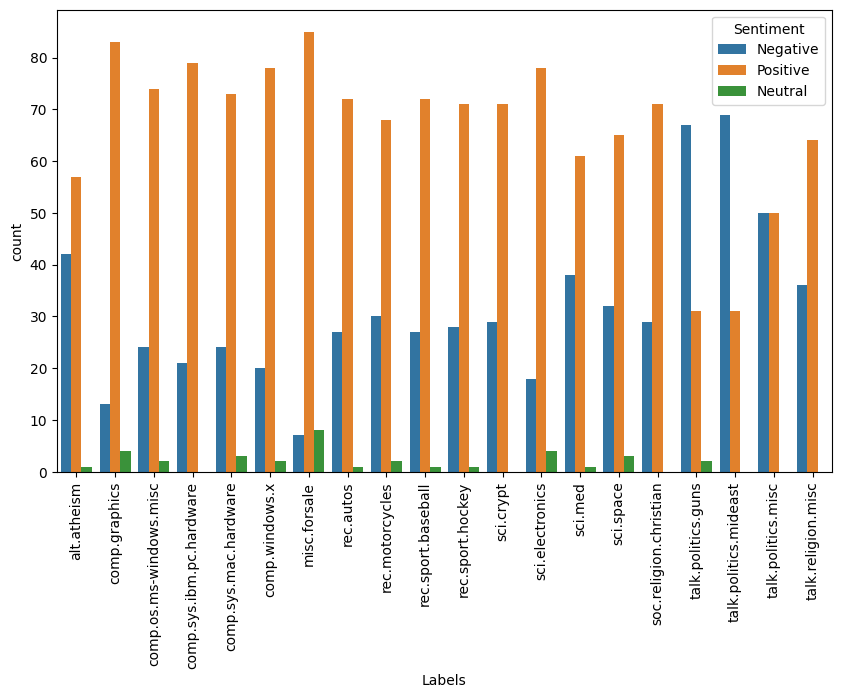

In [46]:
plt.figure(figsize=(10,6))#visulaization of sentiment distribution across categories
sns.countplot(x='Labels',hue='Sentiment',data=df)
plt.xticks(rotation=90)

Most of them are positive.

# **Evaluation**

In [47]:
#evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred=model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')

print(f'Accuracy:{accuracy:.2f}')
print(f'Precision:{precision:.2f}')
print(f'Recall:{recall:.2f}')
print(f'F1 score:{f1:.2f}')

Accuracy:0.83
Precision:0.86
Recall:0.83
F1 score:0.83


In [48]:
print(classification_report(y_test,y_pred))#Classification report

                          precision    recall  f1-score   support

             alt.atheism       0.58      0.82      0.68        17
           comp.graphics       0.84      0.73      0.78        22
 comp.os.ms-windows.misc       0.77      0.95      0.85        21
comp.sys.ibm.pc.hardware       0.77      0.81      0.79        21
   comp.sys.mac.hardware       0.48      0.93      0.63        14
          comp.windows.x       0.89      0.77      0.83        22
            misc.forsale       0.87      0.62      0.72        21
               rec.autos       0.88      0.83      0.86        18
         rec.motorcycles       1.00      0.95      0.97        20
      rec.sport.baseball       0.95      1.00      0.97        19
        rec.sport.hockey       0.95      1.00      0.98        21
               sci.crypt       0.86      0.95      0.90        19
         sci.electronics       1.00      0.50      0.67        26
                 sci.med       0.88      1.00      0.94        15
         

In [49]:
# Reflection on the sentiment analysis results
print(df.groupby('Labels')['Sentiment'].value_counts(normalize=True))

Labels                    Sentiment
alt.atheism               Positive     0.57
                          Negative     0.42
                          Neutral      0.01
comp.graphics             Positive     0.83
                          Negative     0.13
                          Neutral      0.04
comp.os.ms-windows.misc   Positive     0.74
                          Negative     0.24
                          Neutral      0.02
comp.sys.ibm.pc.hardware  Positive     0.79
                          Negative     0.21
comp.sys.mac.hardware     Positive     0.73
                          Negative     0.24
                          Neutral      0.03
comp.windows.x            Positive     0.78
                          Negative     0.20
                          Neutral      0.02
misc.forsale              Positive     0.85
                          Neutral      0.08
                          Negative     0.07
rec.autos                 Positive     0.72
                          Negative     0


# **Model Performance and Challenges**

Accuracy 83% of the blog posts were correctly classified into their respective categories, which suggests that the model has performed well overall.

Precision 86% of those predictions were correct. High precision suggests that the model makes few false positive errors.

Recall 83% of the actual blog posts belonging to each category. The recall score suggests that the model performs well at identifying blog posts across the different categories.

F1 score is the harmonic mean of precision and recall, having an F1 score of 0.83 shows a balance between the precision and recall, making the model robust overall.

**Challenges:**

Text data requires extensive preprocessing, such as cleaning, tokenization, and feature extraction (TF-IDF). There may have been a need for extensive tuning of the preprocessing steps to ensure that important words and n-grams were captured correctly.  

Solution:Experimenting with different preprocessing techniques, such as removing rare words,adjusting TF-IDF parameters, could improve the model's understanding of the data.

In certain categories had significantly more data than others, the model might have skewed towards predicting the majority class. This could lower the recall for the minority classes while inflating precision for the majority class.

# **Reflection on Sentiment Analysis Results**


Sentiment analysis allows  to understand the emotional tone within different blog categories.(positive or negative or neutral tones)

This category has a significant portion of negative sentiments, it may indicate dissatisfaction,positive sentiments might indicate satisfaction or enthusiasm.

If a blog is receiving frequent negative sentiments,it might indicate areas for improvement in the service being reviewed.

A balanced sentiment distribution (with  share of positive, negative, and neutral sentiments) could indicate that the blog content engages readers on a variety of emotional levels.


Sentiment analysis revealed insights into the emotional tone of blog posts, which could be useful for content strategy and user engagement. However, challenges such as misinterpretation of context and potential skew towards neutral sentiment need to be addressed for more accurate insights.